In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv("StudentsPerformance.csv")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
df.drop(['parental level of education','lunch','test preparation course','math score','reading score','writing score'],axis=1)

,gender,race/ethnicity
0,female,group B
1,female,group C
2,female,group B
3,male,group A
4,male,group C
...,...,...
995,female,group E
996,male,group C
997,female,group C
998,female,group D


In [4]:
count = df.groupby(['race/ethnicity','gender']).size()
count

race/ethnicity  gender
group A         female     36
                male       53
group B         female    104
                male       86
group C         female    180
                male      139
group D         female    129
                male      133
group E         female     69
                male       71
dtype: int64

In [5]:
count = pd.DataFrame(count)

In [6]:
count = count.rename(columns = {0:"count of members"})

In [7]:
count = count.reset_index()
count

,race/ethnicity,gender,count of members
0,group A,female,36
1,group A,male,53
2,group B,female,104
3,group B,male,86
4,group C,female,180
5,group C,male,139
6,group D,female,129
7,group D,male,133
8,group E,female,69
9,group E,male,71


In [12]:
count_boys = [i for i,j in zip(count['count of members'],count['gender']) if j=='male']
count_boys

[53, 86, 139, 133, 71]

In [13]:
count_girls = [i for i,j in zip(count['count of members'],count['gender']) if j=='female']
count_girls

[36, 104, 180, 129, 69]

In [15]:
groups = count['race/ethnicity'].unique()
print(groups)

['group A' 'group B' 'group C' 'group D' 'group E']


In [18]:
x_axis = np.arange(len(groups))

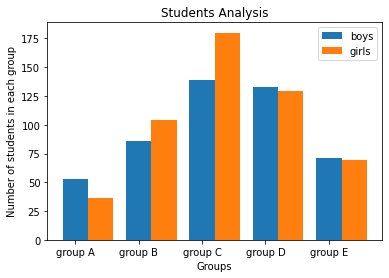

In [26]:
plt.bar(x_axis, count_boys, 0.4, label = 'boys')
plt.bar(x_axis + 0.4, count_girls, 0.4, label = 'girls')
plt.xticks(x_axis,groups)
plt.xlabel('Groups')
plt.ylabel('Number of students in each group')
plt.title('Students Analysis')
plt.legend()
plt.show()